### Plotting Weights

In [1]:
import pandas as pd 
results_df = pd.read_csv("results_df.csv")

file_path = 'FnGuide Data 0529.csv'
fn_data = pd.read_csv(file_path, skiprows=13)

column_names = [
    'Date', 'KOSPI', 'KOSDAQ', 'S&P 500', 'STOXX 50', 'Nikkei 225',
    'CSI 300', 'TB 10Y', 'Prime CBonds', 'Foreign Bonds',
    'Gold', 'WTI', 'KOSPI Short', 'US Long', 'US Short', 'MMF'
]

fn_data.columns = column_names
fn_data.iloc[:, 1:] = fn_data.iloc[:, 1:].replace(',', '', regex=True).astype(float)
fn_data['Date'] = pd.to_datetime(fn_data['Date'])
fn_data.set_index('Date', inplace=True)

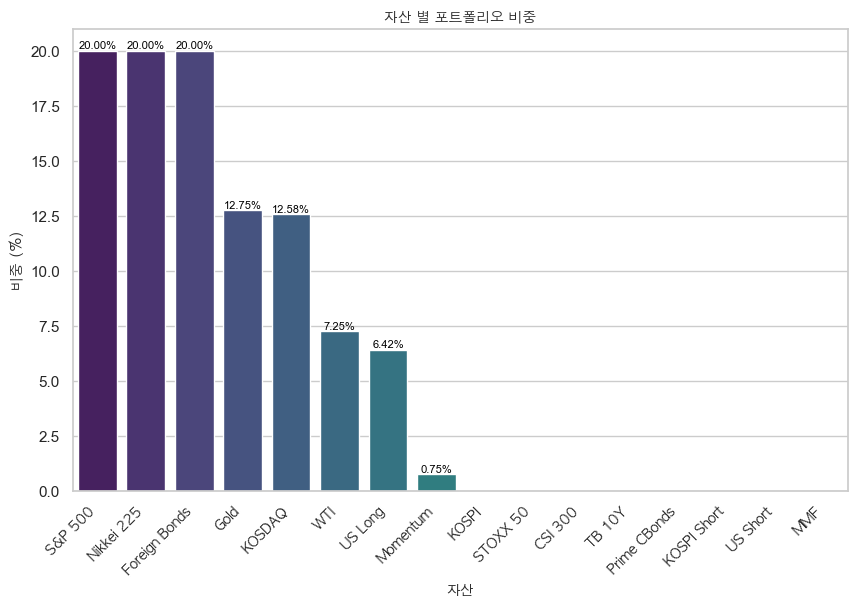

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

portfolio_weights = results_df.iloc[15][1:17].round(2)
sorted_weights_desc = portfolio_weights.sort_values(ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=sorted_weights_desc.index, y=sorted_weights_desc.values, palette="viridis")

plt.title('자산 별 포트폴리오 비중', fontproperties=prop)
plt.xlabel('자산', fontproperties=prop)
plt.ylabel('비중 (%)', fontproperties=prop)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), fontproperties=prop, rotation=45, horizontalalignment='right')

for p in bar_plot.patches:
    if p.get_height() > 0: 
        bar_plot.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom', fontsize=8, color='black') 

plt.show()

plt.savefig('portfolio_weights.png', dpi=300) 

### Plotting KOSPI vs KOSDAQ 

In [3]:
fn_data[['KOSPI', 'KOSDAQ']]

,KOSPI,KOSDAQ
Date,,
2016-03-03,24370.0,10850.0
2016-03-04,24375.0,10880.0
2016-03-07,24425.0,10825.0
2016-03-08,24255.0,10835.0
2016-03-09,24360.0,10900.0
...,...,...
2024-05-22,37265.0,13850.0
2024-05-23,37265.0,13810.0
2024-05-24,36685.0,13675.0


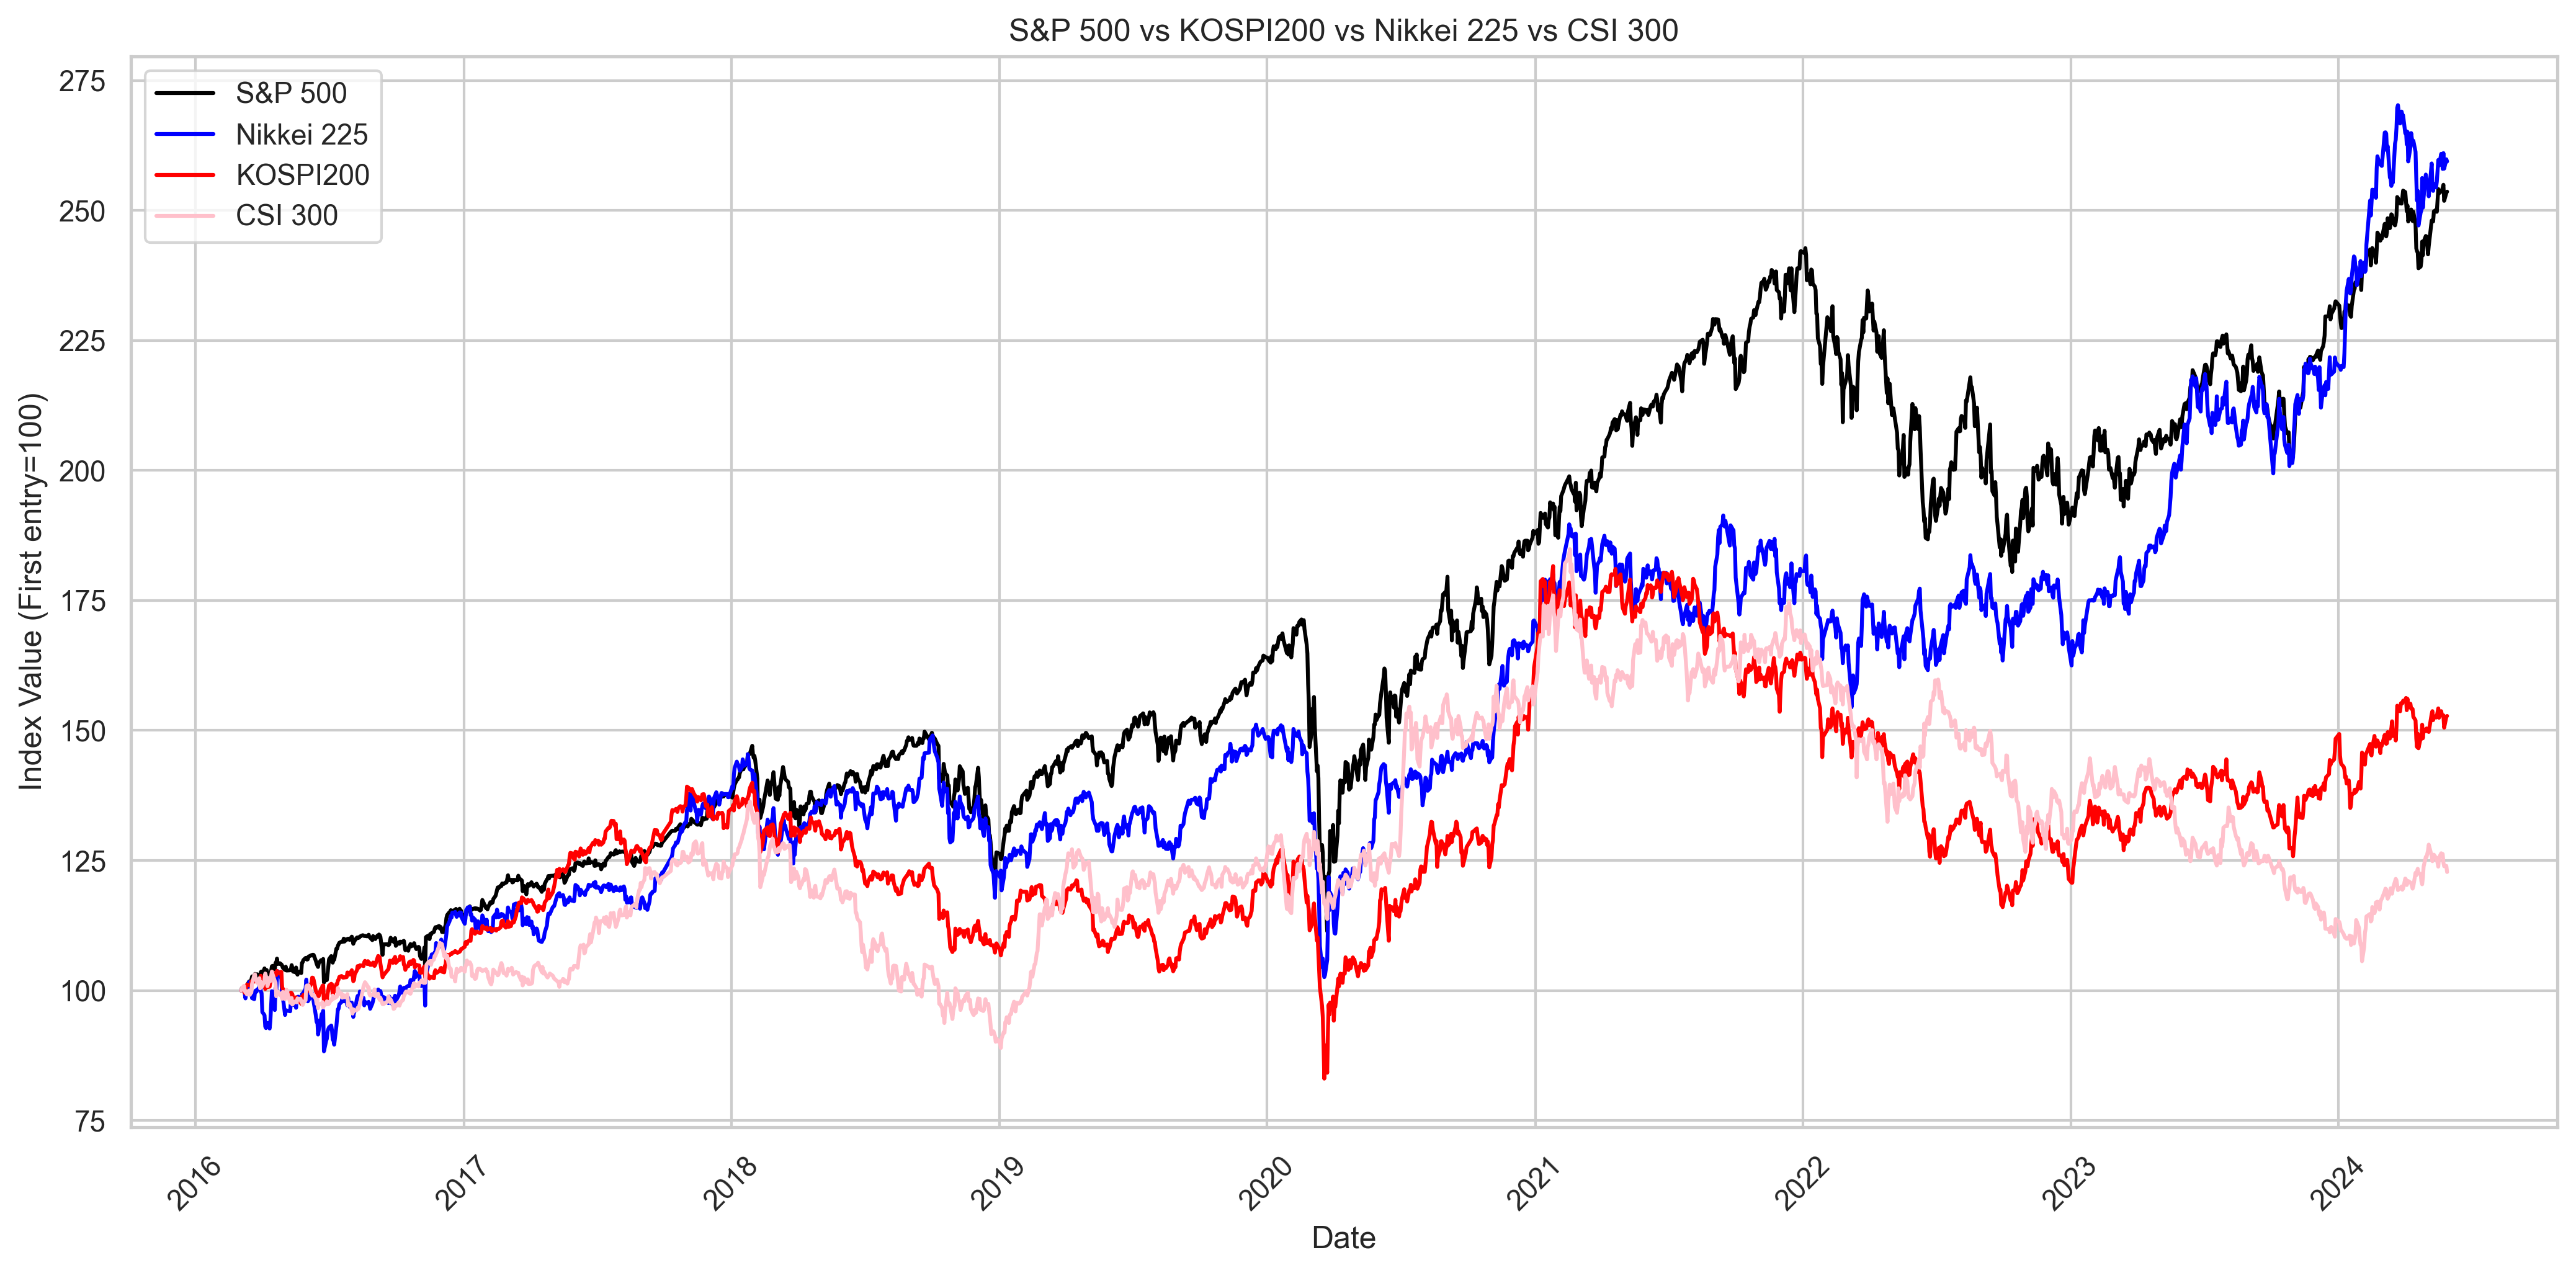

In [4]:
kospi_kosdaq_compare = fn_data.copy() 
kospi_kosdaq_compare['S&P 500'] = (kospi_kosdaq_compare['S&P 500'] / kospi_kosdaq_compare['S&P 500'].iloc[0]) * 100
kospi_kosdaq_compare['Nikkei 225'] = (kospi_kosdaq_compare['Nikkei 225'] / kospi_kosdaq_compare['Nikkei 225'].iloc[0]) * 100
kospi_kosdaq_compare['KOSPI'] = (kospi_kosdaq_compare['KOSPI'] / kospi_kosdaq_compare['KOSPI'].iloc[0]) * 100
kospi_kosdaq_compare['CSI 300'] = (kospi_kosdaq_compare['CSI 300'] / kospi_kosdaq_compare['CSI 300'].iloc[0]) * 100

plt.figure(figsize=(14, 7), dpi=300)  
plt.plot(kospi_kosdaq_compare.index, kospi_kosdaq_compare['S&P 500'], label='S&P 500', color='black')
plt.plot(kospi_kosdaq_compare.index, kospi_kosdaq_compare['Nikkei 225'], label='Nikkei 225', color='blue')
plt.plot(kospi_kosdaq_compare.index, kospi_kosdaq_compare['KOSPI'], label='KOSPI200', color='red')
plt.plot(kospi_kosdaq_compare.index, kospi_kosdaq_compare['CSI 300'], label='CSI 300', color='pink')
plt.xlabel('Date')
plt.ylabel('Index Value (First entry=100)')
plt.title('S&P 500 vs KOSPI200 vs Nikkei 225 vs CSI 300')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

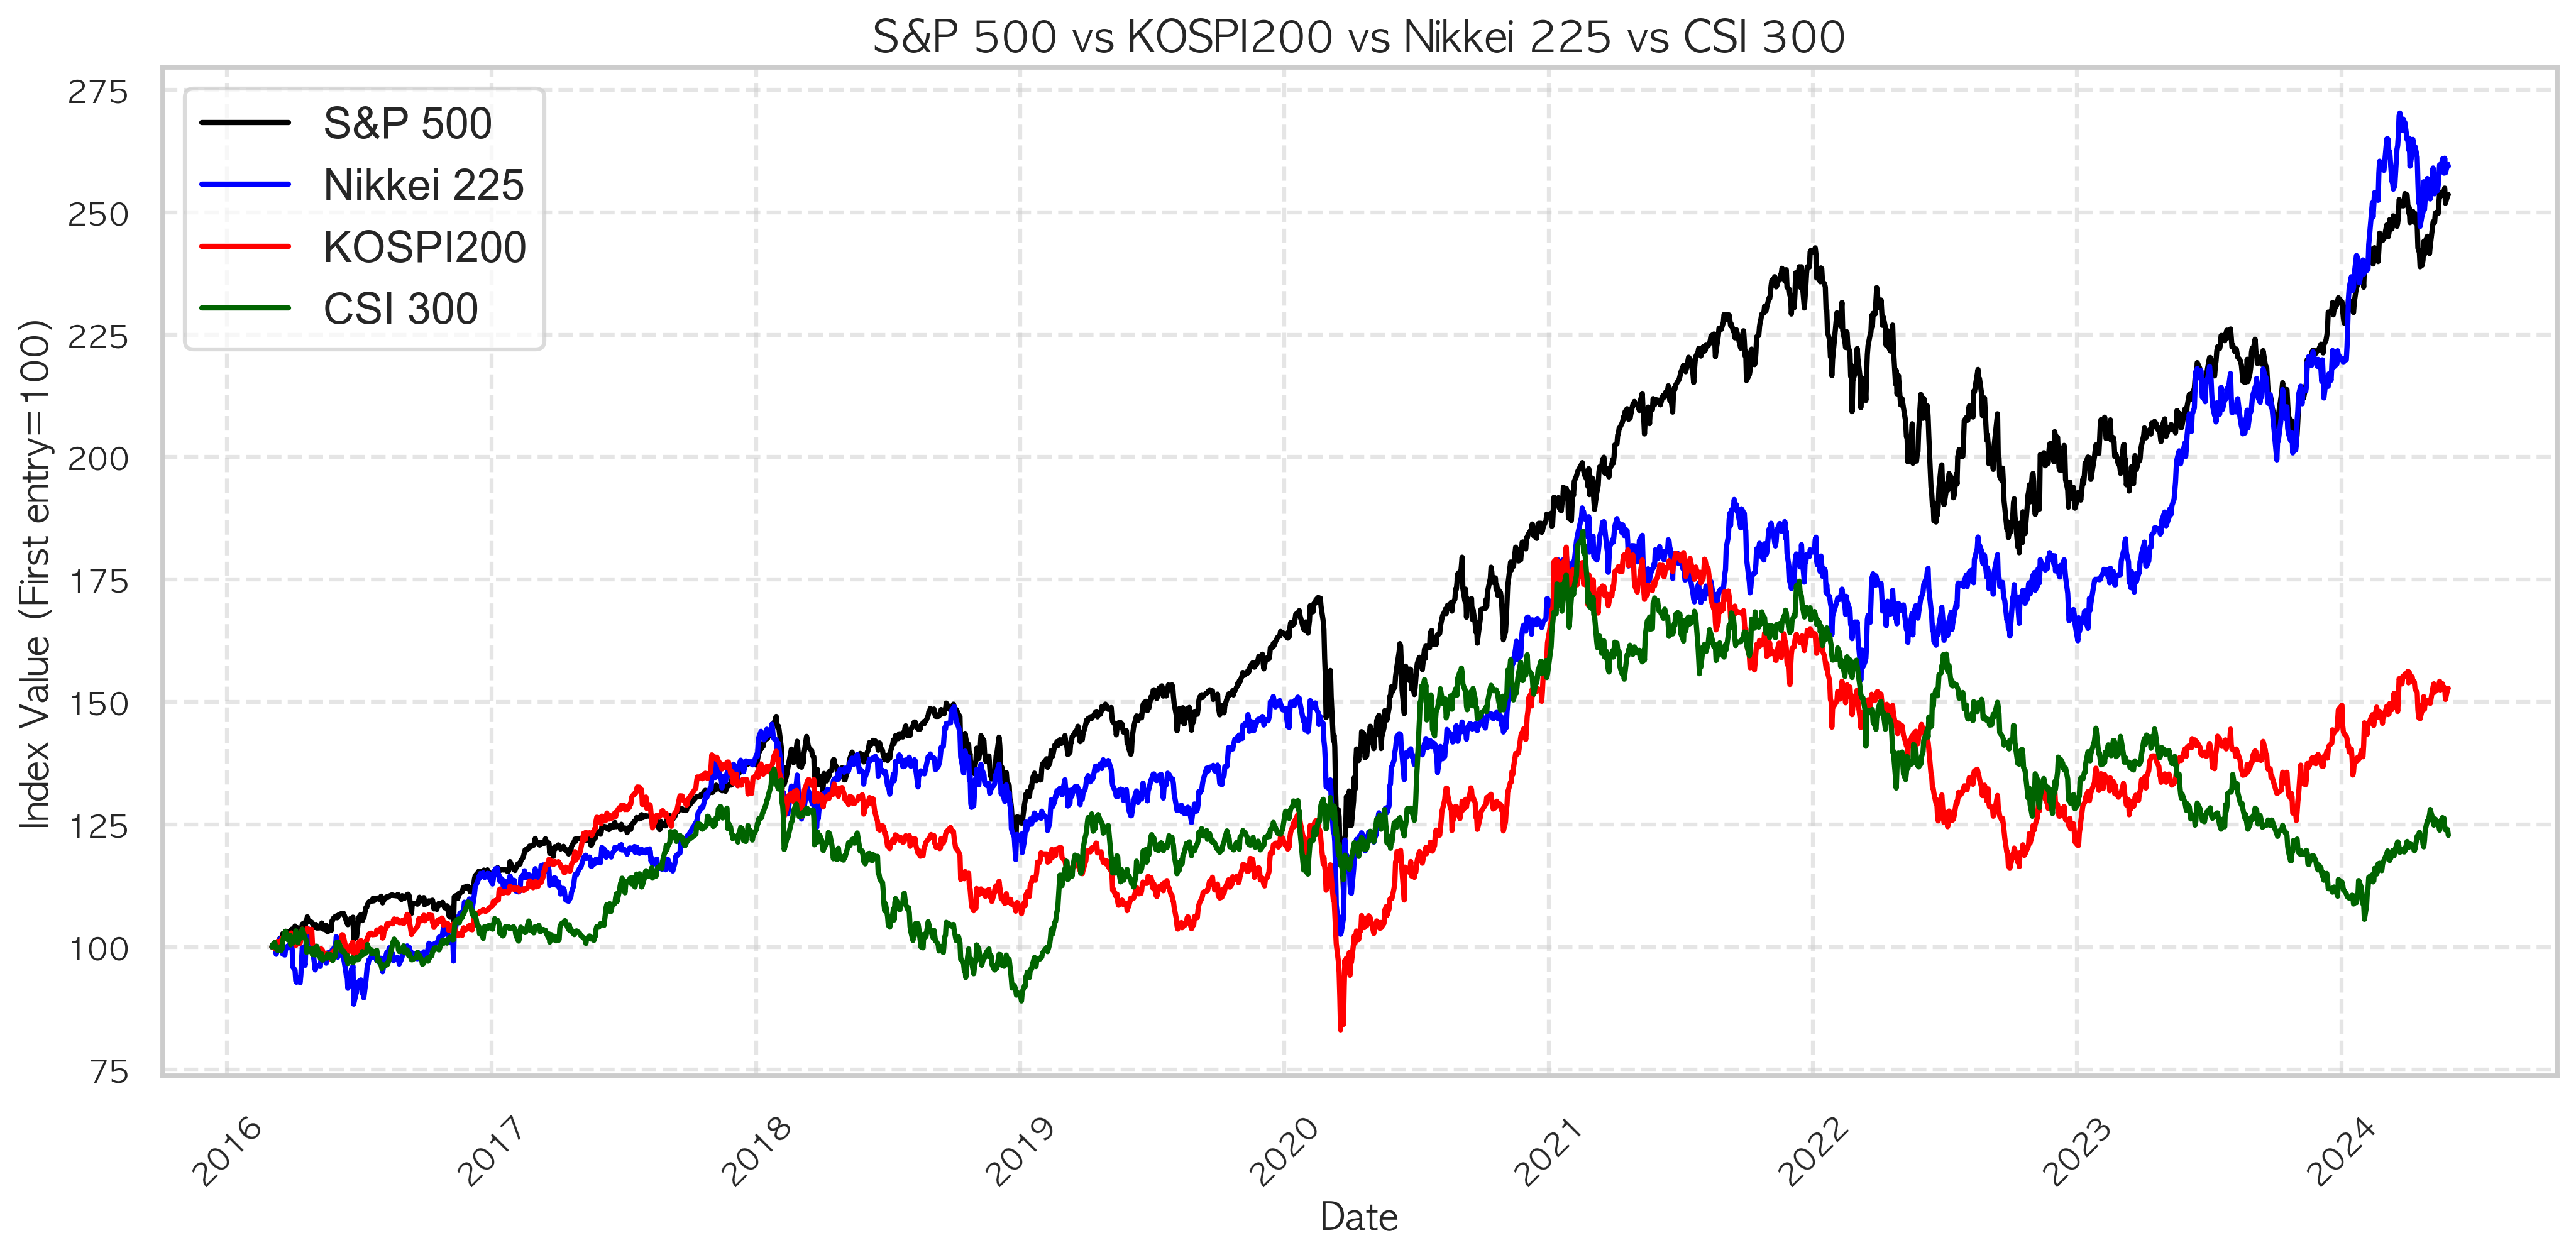

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

kospi_kosdaq_compare = fn_data.copy()
kospi_kosdaq_compare['S&P 500'] = (kospi_kosdaq_compare['S&P 500'] / kospi_kosdaq_compare['S&P 500'].iloc[0]) * 100
kospi_kosdaq_compare['Nikkei 225'] = (kospi_kosdaq_compare['Nikkei 225'] / kospi_kosdaq_compare['Nikkei 225'].iloc[0]) * 100
kospi_kosdaq_compare['KOSPI'] = (kospi_kosdaq_compare['KOSPI'] / kospi_kosdaq_compare['KOSPI'].iloc[0]) * 100
kospi_kosdaq_compare['CSI 300'] = (kospi_kosdaq_compare['CSI 300'] / kospi_kosdaq_compare['CSI 300'].iloc[0]) * 100

sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context("talk")

plt.figure(figsize=(14, 7), dpi=300)
plt.plot(kospi_kosdaq_compare.index, kospi_kosdaq_compare['S&P 500'], label='S&P 500', color='black', linewidth=2)
plt.plot(kospi_kosdaq_compare.index, kospi_kosdaq_compare['Nikkei 225'], label='Nikkei 225', color='blue', linewidth=2)
plt.plot(kospi_kosdaq_compare.index, kospi_kosdaq_compare['KOSPI'], label='KOSPI200', color='red', linewidth=2)
plt.plot(kospi_kosdaq_compare.index, kospi_kosdaq_compare['CSI 300'], label='CSI 300', color='darkgreen', linewidth=2)

plt.xlabel('Date', fontproperties=prop, fontsize=14)
plt.ylabel('Index Value (First entry=100)', fontproperties=prop, fontsize=14)
plt.title('S&P 500 vs KOSPI200 vs Nikkei 225 vs CSI 300', fontproperties=prop, fontsize=16)
plt.legend(frameon=True, framealpha=0.7, fancybox=True)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xticks(rotation=45, fontproperties=prop)
plt.yticks(fontproperties=prop)

plt.tight_layout() 
plt.show()